<a href="https://colab.research.google.com/github/rakshithaelango/-Customer-Conversion-Prediction/blob/main/Customer_Conversion_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Understanding the data**

Project motive is to predict **customer conversion for an insurance company**. Using data, we will develop a machine learning model that can identify which customers are most likely to purchase a policy.

**From the Given DataSet is:**

It is Supervised Machine Learning.

We have target variable y.

It is classification problem.

y is a continuous variable.

# **Importing Libraries**

Import all the libraries by seeing the given data. To analyse the Model.

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder

# spliting into train and test 
from sklearn.model_selection import train_test_split

# applying machine learning to get good model 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score,confusion_matrix

# perform over-sampling using SMOTE
from imblearn.combine import SMOTETomek

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **loading dataset**

We need to load the data by using .csv. After loading the data.

* Fetch the first five rows in dataset
* Fetch the last five rows in dataset
* Fetch the size of the dataset
* Fetch what all the columns present in dataset
* And finally , we can get overall information about the dataset

In [150]:
df = pd.read_csv('/content/train.csv')

In [151]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [152]:
# First five rows 
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [153]:
# Last five rows
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [154]:
# no.of.Rows and columns present
df.shape

(45211, 11)

In [155]:
# columns names present in dataset 
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [156]:
# overall information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


# **Data Cleaning**

In this step, we understand more about the data and prepare it for further analysis.Cleaning data essentially means removing discrepancies from data such as missing fields, improper values, setting the right format of the data, structuring data from raw files.


In [157]:
# checking data types of columns present
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

**Checking Missing values**

Missing data simply means that some cells in our data set are empty.

In [158]:
# checking for null values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

From the above Result no missing value is present

**Finding duplicates values**

In [159]:
# checking for duplicate values
df.duplicated().sum() 

6

In [160]:
# dropping  the duplicates
df.drop_duplicates()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no


In [161]:
# after droping the duplicates
df.duplicated().sum()

6

After , the dropping of duplicates . again re-check the duplicates columns to check if there is any duplicates is present or not. But Finally, the result is 0

In [162]:
# statistically checking 
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


## **Handling Outliers**


**Box plot**

###**Age**

<Axes: xlabel='age'>

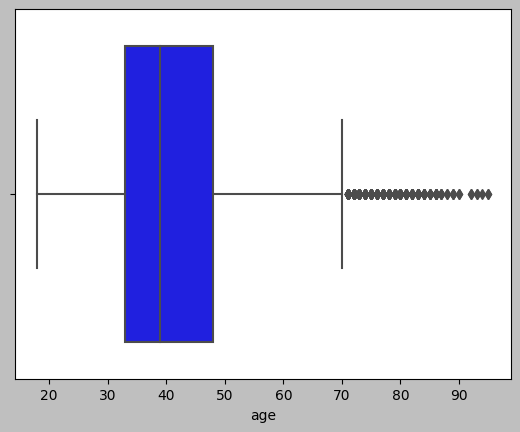

In [163]:
# Age
sns.boxplot(x=df['age'], color='Blue')

**From the above outlierwe can able to see that many dots are displayed outside whisker.**



**IQR**

In [164]:
q1,q3=np.percentile(df["age"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper age bound:",upper,"Lower age bound :", lower)

Upper age bound: 70.5 Lower age bound : 10.5


**Removing outlier**

In [165]:
df.age = df.age.clip(10.5,70.5) 

In [166]:
df.age.describe()

count    45211.000000
mean        40.868185
std         10.394895
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.500000
Name: age, dtype: float64

**Re-checking the age outlier**

<Axes: xlabel='age'>

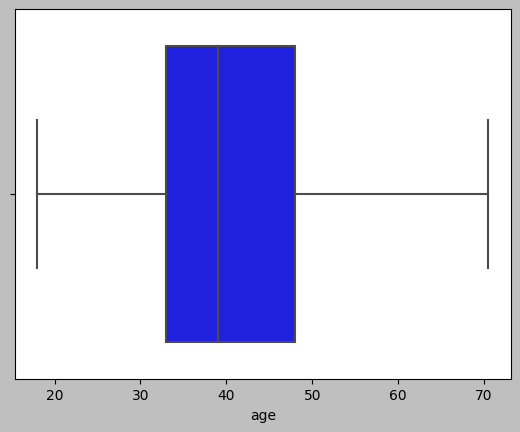

In [167]:
sns.boxplot(x=df['age'], color='Blue')

**Day**

<Axes: xlabel='day'>

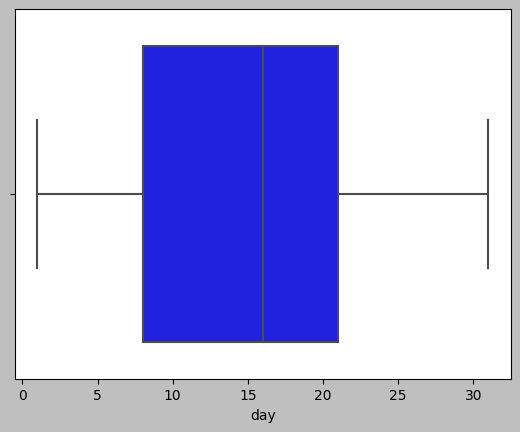

In [168]:
sns.boxplot(x=df['day'], color='Blue') 

**From the above case No outlier is presented.**

**IQR**

In [169]:
q1,q3=np.percentile(df["day"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 40.5 Lower bound : -11.5


In [170]:
df.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

**Duration**

<Axes: >

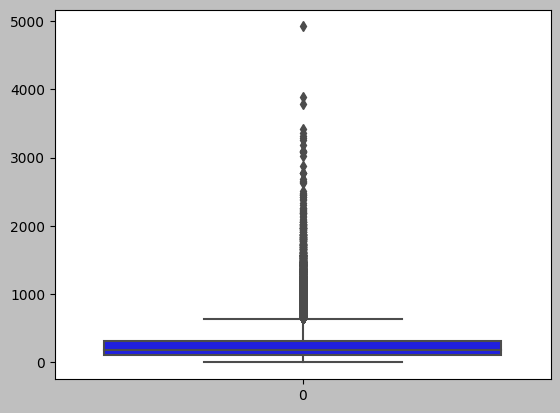

In [171]:
# Duration
sns.boxplot(df['dur'], color='Blue')

**From the above outlierwe can able to see that many dots are displayed outside whisker.**

**IQR**

In [172]:
q1,q3=np.percentile(df["dur"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 643.0 Lower bound : -221.0


**Removing outlier**

In [173]:
df.dur = df.dur.clip(-219.5,640.5)

In [174]:
df.dur.describe()

count    45211.000000
mean       234.759262
std        176.334952
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        640.500000
Name: dur, dtype: float64

**Re-checking the dur outlier**

<Axes: >

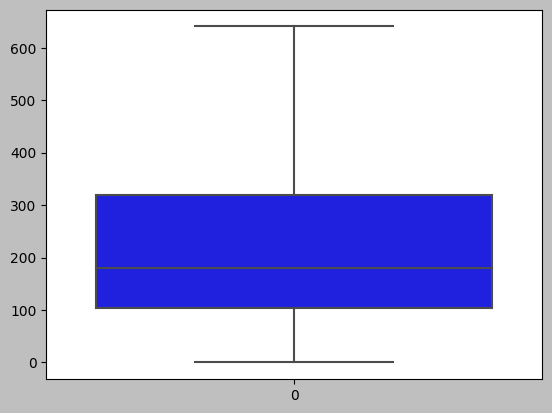

In [175]:
sns.boxplot(df['dur'], color='Blue')

**Num_calls**

<Axes: >

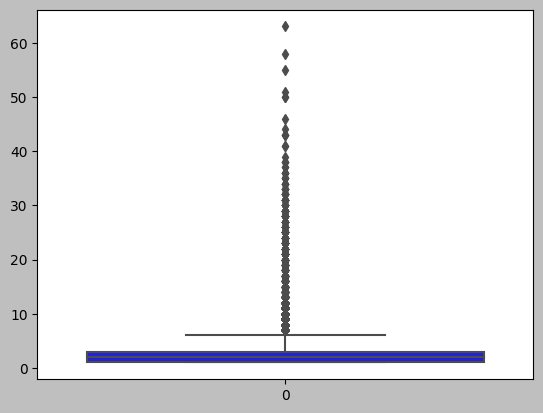

In [176]:
sns.boxplot(df['num_calls'], color='Blue')

**From the above outlierwe can able to see that many dots are displayed outside whisker.**

**IQR**

In [177]:
q1,q3=np.percentile(df["num_calls"],[25,75])
IQR=q3-q1
upper=q3+1.5*IQR
lower=q1-1.5*IQR
print("Upper bound:",upper,"Lower bound :", lower)

Upper bound: 6.0 Lower bound : -2.0


**Removing outlier**

In [178]:
df.num_calls = df.num_calls.clip(-2,6.0)

In [179]:
df.num_calls.describe()

count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

**Re-checking the num_calls outlier**

<Axes: >

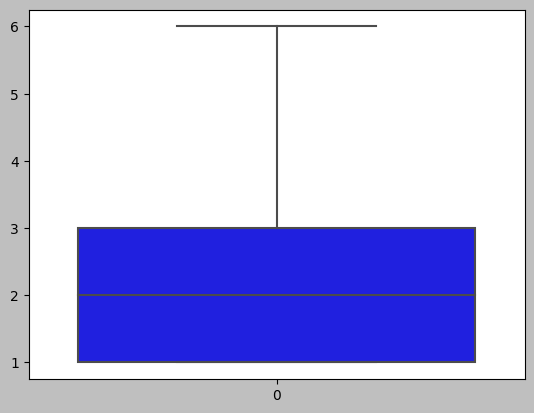

In [180]:
sns.boxplot(df['num_calls'], color='Blue')

In [181]:
# statistical checking after the correction of outlier
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.868185,15.806419,234.759262,2.392228
std,10.394895,8.322476,176.334952,1.600111
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,70.500000,31.000000,640.500000,6.000000


## **Exploratory Data Analysis**

EDA is backbone for data scientists. To analyze and investigate data sets and summarize their main characteristics,By using data visualization methods.

In [182]:
#checking it is balanced or not
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [183]:
((39922)/(39922+5289))*100
     

88.30151954170445

In [184]:
((5289)/(39922+5289))*100

11.698480458295547

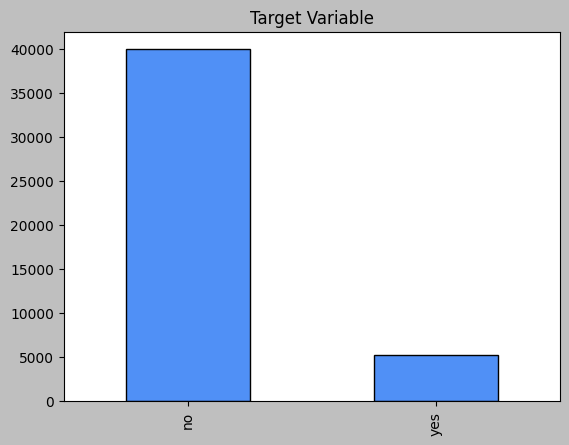

In [185]:
# Bar plot
df['y'].value_counts().plot.bar(color = np.random.rand(3,), ec='black')
plt.title("Target Variable")
plt.show()

we can see that target column is imbalanced data

**univariate analysis feature of categorical variables.**

Exploring variables(attributes)one by one.

<Axes: >

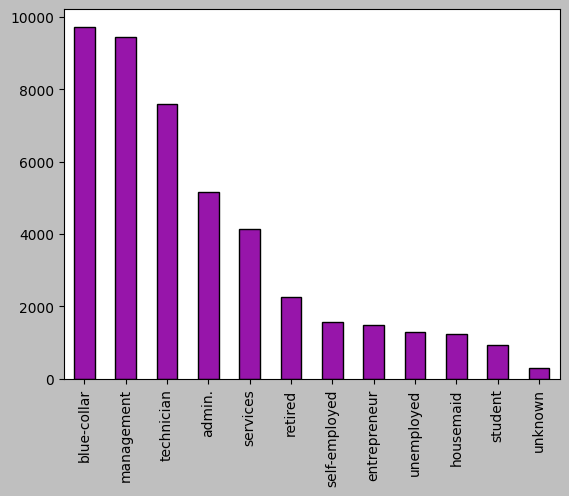

In [186]:
# job
df['job'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case most of the clients belongs to blue-collar, management, technician job and the students are least in number.**

<Axes: >

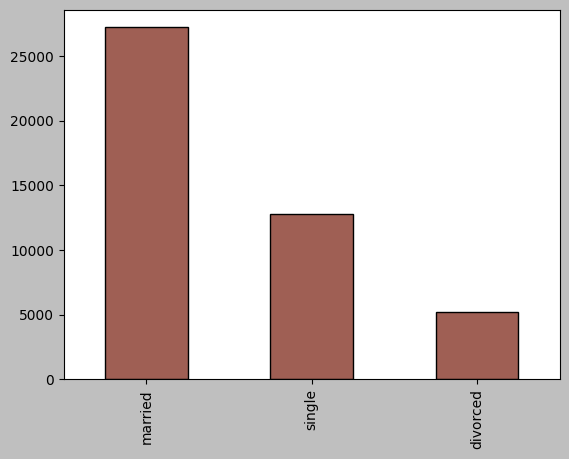

In [187]:
# marital
df['marital'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case mostly are married clients.**

<Axes: >

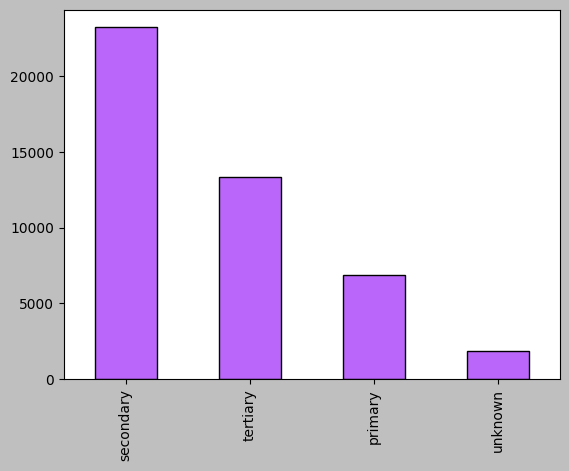

In [188]:
#education_qual
df['education_qual'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case most of the clients belongs to secondary qualification.**

<Axes: >

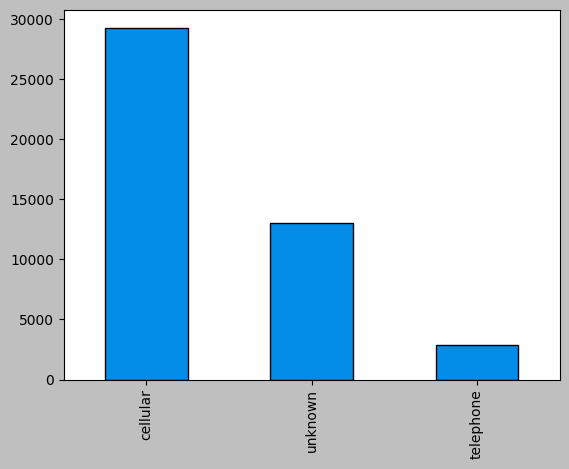

In [189]:
# call_type 
df['call_type'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case cellular call_type is mostly presented.**

<Axes: >

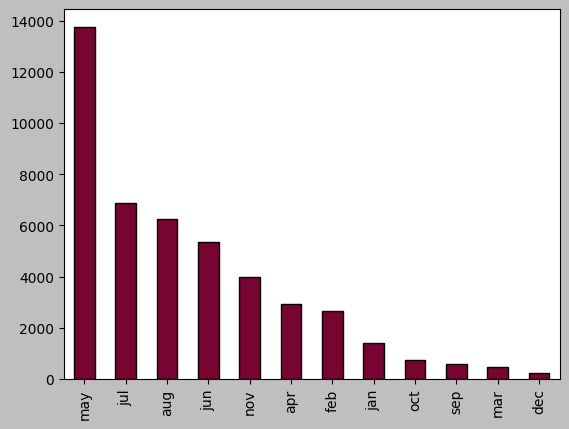

In [190]:
# mon
df['mon'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case clients have been contacted in the month of May.**

<Axes: >

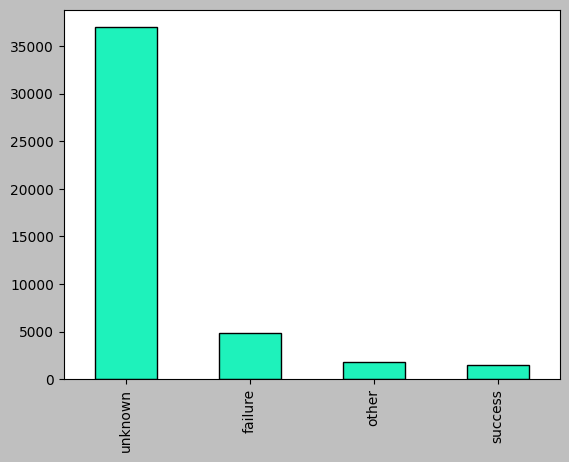

In [191]:
# prev_outcome
df['prev_outcome'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case unknown distributed is presented more than others.**

<Axes: >

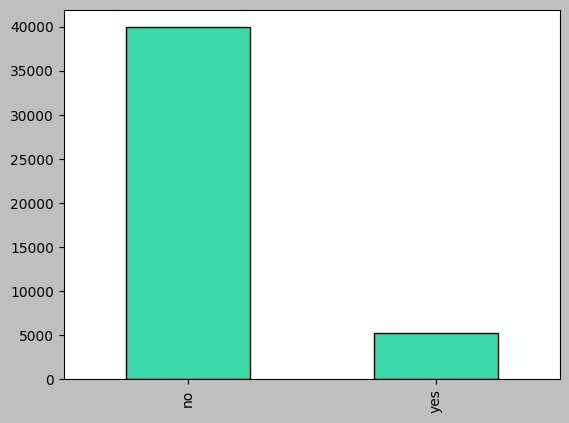

In [192]:
# Y
df['y'].value_counts().plot.bar(color = np.random.rand(3,), ec='Black')

**From the above case plot for the target variable shows massive imbalanced.**

In [193]:
cate_var=['job','education_qual']
for column in cate_var:
    mode= df[column].mode()[0]
    df[column]= df[column].replace("unknown", mode)   

**univariate analysis of feature numerical variables.**

<ipython-input-194-d56b02e25569>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)
<ipython-input-194-d56b02e25569>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.day,color = 'darkblue')


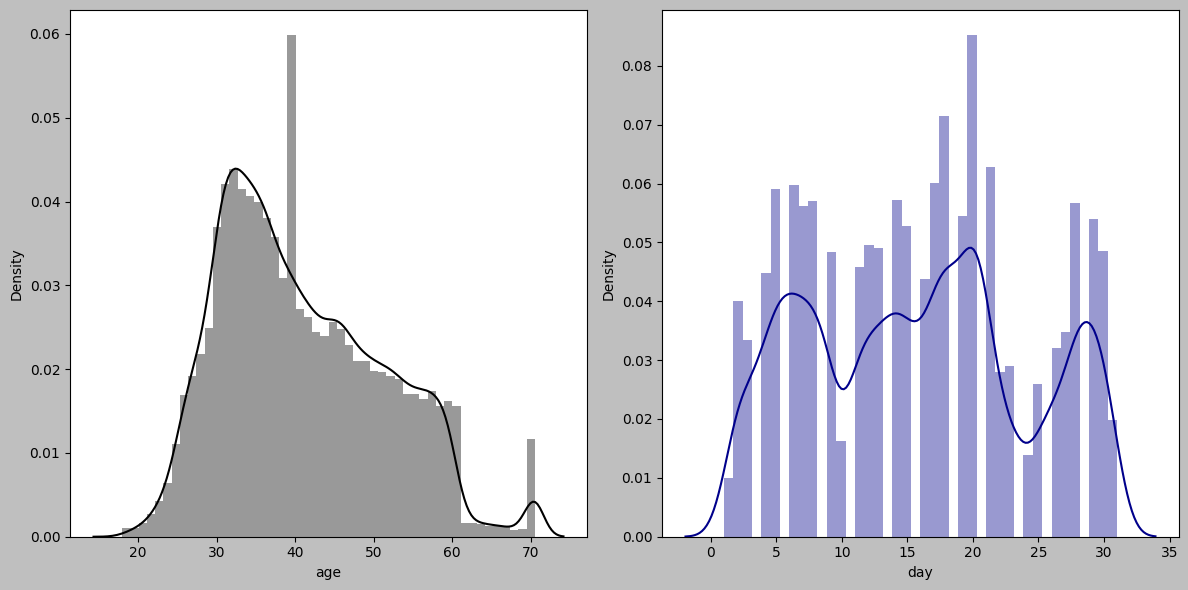

In [194]:
# age and day
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.age)
plt.subplot(1,2,2)
sns.distplot(df.day,color = 'darkblue')
plt.tight_layout()

**Most of the clients fall in the age group between 20-60.**

**Middle of the day recieved more than other.**

<ipython-input-195-bcfaaca70d84>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.dur,color = 'green')
<ipython-input-195-bcfaaca70d84>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.num_calls,color = 'red')


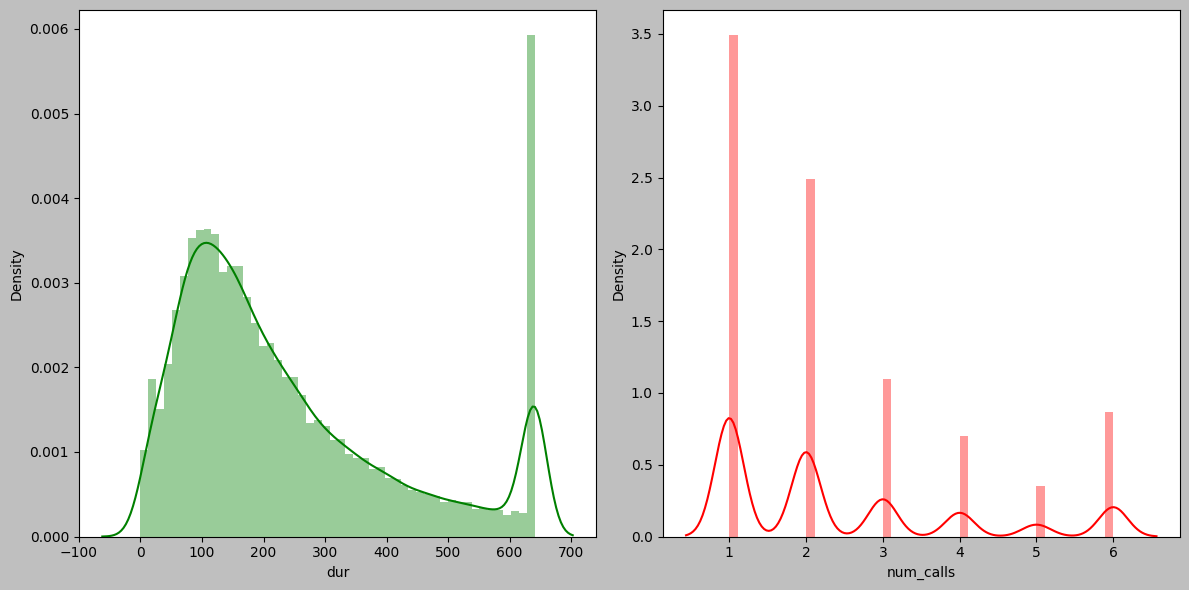

In [195]:
#dur and num_calls
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df.dur,color = 'green')
plt.subplot(1,2,2)
sns.distplot(df.num_calls,color = 'red')
plt.tight_layout()

**Call duration impact the model to subcribe the insurance.**

**num_calls made also the reason to sbscribe the insurance.**

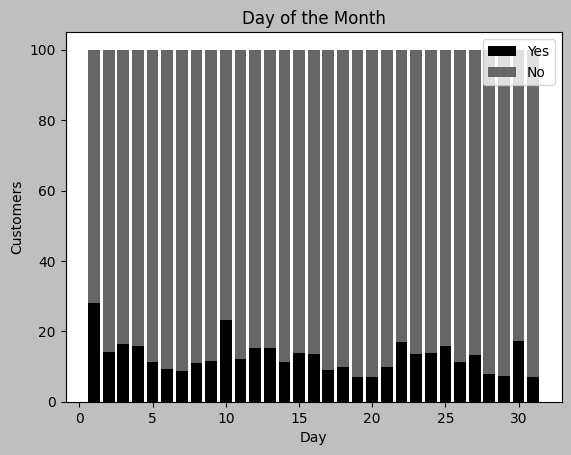

In [196]:
day_counts = df.groupby('day')['y'].value_counts(normalize=True) * 100
yes_counts = day_counts[:, 'yes']
no_counts = day_counts[:, 'no']
plt.bar(day_counts.index.levels[0], yes_counts, label='Yes')
plt.bar(day_counts.index.levels[0], no_counts, bottom=yes_counts, label='No')
plt.xlabel('Day')
plt.ylabel('Customers')
plt.title('Day of the Month')
plt.legend()
plt.show()


**Bivariate Analysis of Categorical Columns.**

This is statistical analysis in which two variables are observed against each other. One of the variables will be dependent, and the other is independent. The variables are denoted by X and Y.

In [197]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome',
       'y'],
      dtype='object')


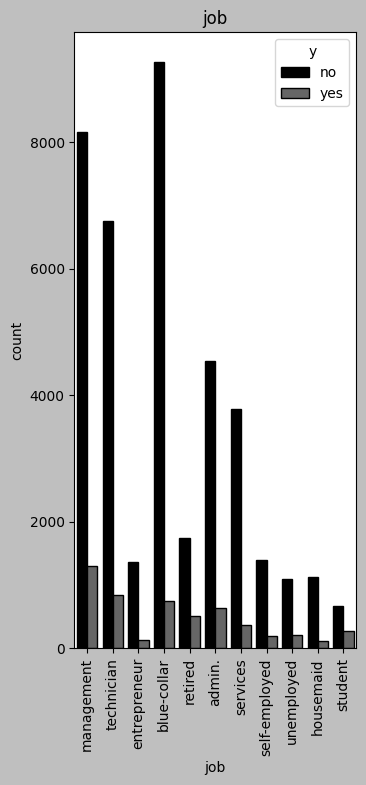

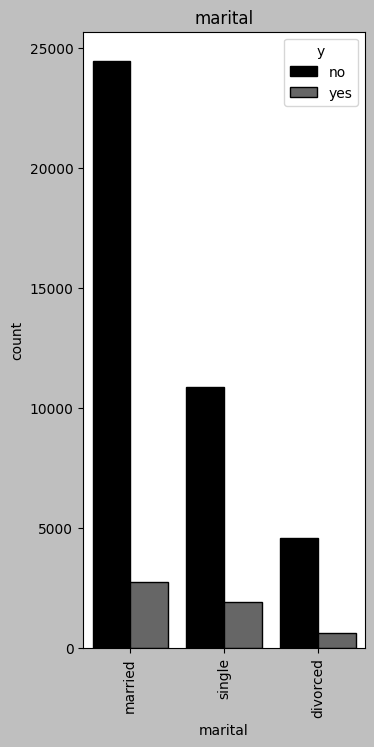

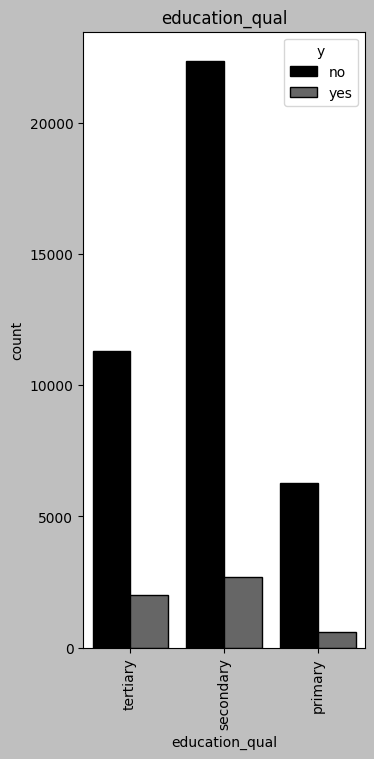

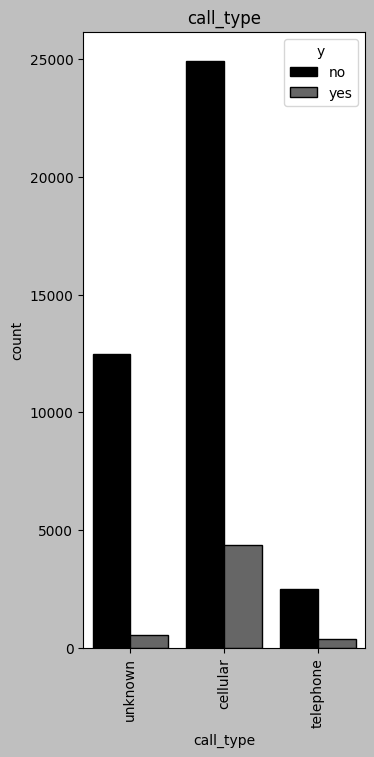

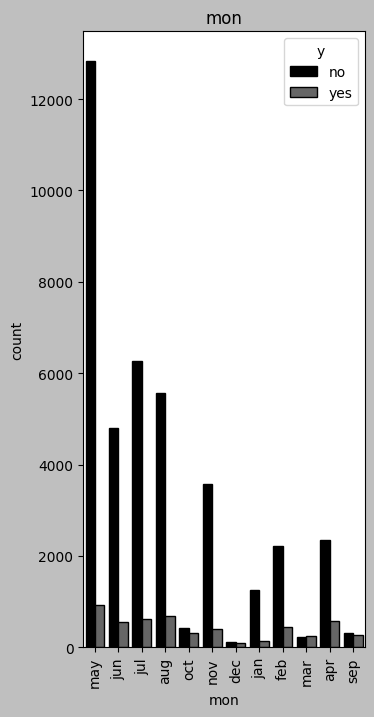

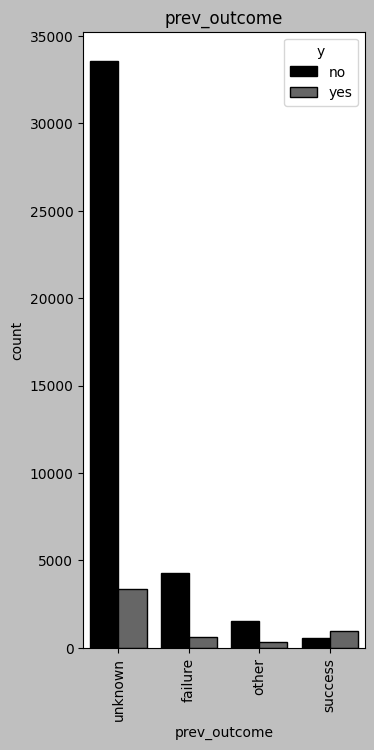

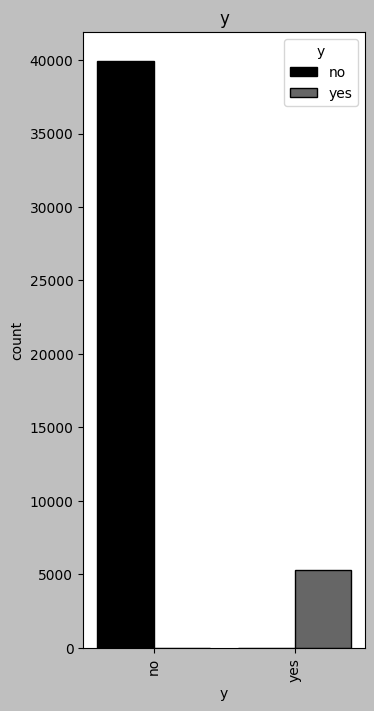

In [198]:
plt.style.use("grayscale")
for column in cat_var:
    plt.figure(figsize=(8,8))
    ax = plt.subplot(121)
    sns.countplot(x=column, hue="y", data=df, ec='black')
    plt.title(column)    
    plt.xticks(rotation=90)
    plt.show()

# **Encoding categorical feature**

The process of converting the categorical features into numeric features. 

In [199]:
df.replace({'y' : { 'yes' : 1, 'no' : 0}},inplace=True)

<ipython-input-200-2def5ff5d1dd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

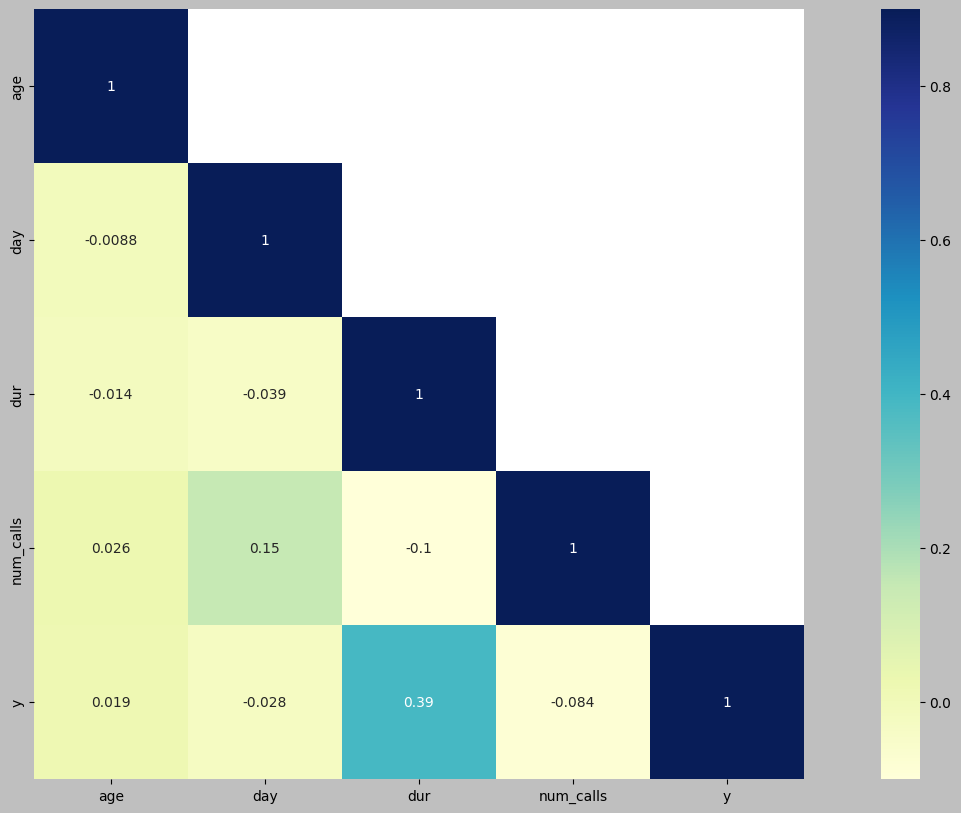

In [200]:
corr = df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [201]:
cat_var= df.select_dtypes(include= ["object"]).columns
print(cat_var)

Index(['job', 'marital', 'education_qual', 'call_type', 'mon', 'prev_outcome'], dtype='object')


In [202]:
for i in cat_var:
    print(i, ":", df[i].unique())

job : ['management' 'technician' 'entrepreneur' 'blue-collar' 'retired' 'admin.'
 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
marital : ['married' 'single' 'divorced']
education_qual : ['tertiary' 'secondary' 'primary']
call_type : ['unknown' 'cellular' 'telephone']
mon : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
prev_outcome : ['unknown' 'failure' 'other' 'success']


In [203]:
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [204]:
columns=['call_type','prev_outcome','marital','job']
df=encoding_data(df,columns)

In [205]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['mon'] = df['mon'].apply(
    lambda x: months.index(x)+1)
df.replace({'education_qual' : { 'tertiary' : 1, 'secondary' : 2, 'primary' : 3 }},inplace=True)

# **Spliting of data**

In [206]:
r= df.drop(['y'],axis=1)
s= df['y']

In [207]:
smote_tomek = SMOTETomek(sampling_strategy=0.75)
X, y = smote_tomek.fit_resample(r, s)
print(y.value_counts())

0    39676
1    29695
Name: y, dtype: int64


## **Spliting into train and test**

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Scalling**
## **Standard Scaler**

In [209]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Modelling**

In this model bulding algorthim  we apply three machine learning model:

* Logistic Regression.

* Random forest.

* Xgboost.

**LogisticRegression**

In [210]:
from sklearn.linear_model import LogisticRegression 

lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))
log_reg_y_pred_prob = lr_model.predict_proba(X_test)[:, 1]
log_reg_auc = roc_auc_score(y_test, log_reg_y_pred_prob)




The accuracy of Logistic Regression is :  92.13733455641463 %
The aurroc_auc_score of Logistic Regression is :  0.9759023024067213


**RandomForest**

In [211]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))
dt_y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_y_pred_prob)
dt_auc = roc_auc_score(y_test, dt_y_pred_prob)

The accuracy of Random Forest is :  93.67929061285109 %
The aurroc_auc_score of  random forest is :  0.9856346379622419


**XGboost**

In [212]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train) 
predicted = xgb_model.predict(X_test)

print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))
xgb_y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
xgb_auc = roc_auc_score(y_test, xgb_y_pred_prob)
     

/usr/local/lib/python3.9/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  93.52203730397937 %
The aurroc_auc_score of Gradient Boosting is :  0.9862351936384334


## **Above model applying**

we get the score of accuracy and aurroc_auc_:

* **LogisticRegression:** 

The accuracy of Logistic Regression is :  91.73726963053542 %

The aurroc_auc_score of Logistic Regression is :  0.9725220610365056

* **RandomForest:**

The accuracy of Random Forest is :  93.39243602061316 %

The aurroc_auc_score of  random forest is :  0.9843573857991998

* **XGBOOST:**

The accuracy of X Gradient Boosting is :  93.47541269979911 %

The aurroc_auc_score of Gradient Boosting is :  0.9858091411382701

# **Feature Importance**

Techniques that calculate a score for all the input features for a given model. 

<Axes: >

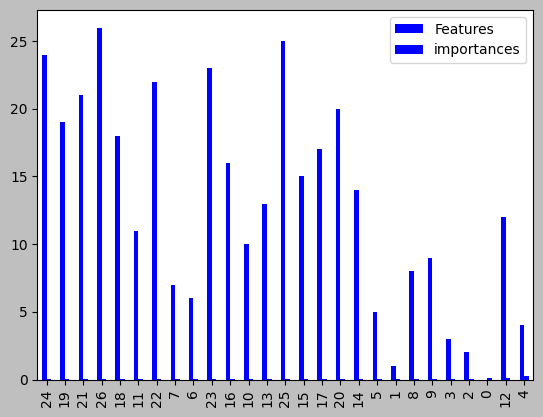

In [213]:
importances = rf_model.feature_importances_
df1 = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df1.set_index("importances")
df1 = df1.sort_values('importances')
df1.plot.bar(color='blue')

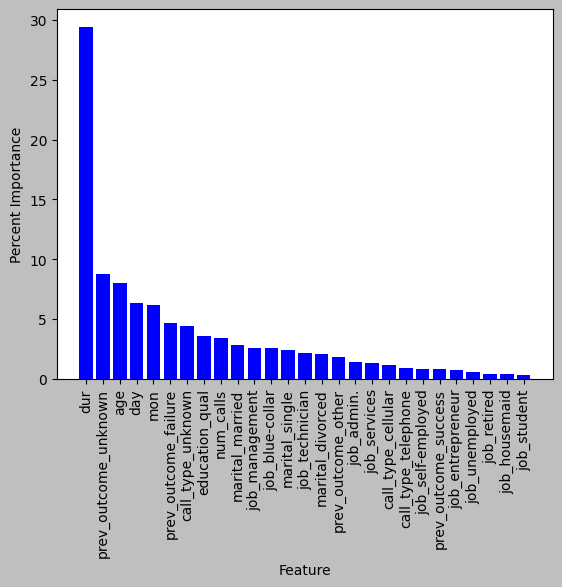

In [214]:
feature_names = list(df.columns)
if 'y' in feature_names:
    feature_names.remove('y')
total_importance = importances.sum()
percent_importances = importances / total_importance * 100
df = pd.DataFrame({'feature_names': feature_names, 'percent_importances': percent_importances})
df = df.sort_values(by='percent_importances', ascending=False)
plt.bar(x=df['feature_names'], height=df['percent_importances'], color='Blue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Percent Importance')
plt.show()

### **Most important feature is duration**

# **Conclusion**

The Feature Importance given by best machine Learning that will predict if a client subscribed to the insurance.

After applying the machine learning model by using logistics , random forest , xgboost  method.

We conclude that Xgboost performed well! 
